In [18]:
# Install SAM 2 (official) and CLIPSeg
!pip install -q git+https://github.com/facebookresearch/sam2.git
!pip install -q transformers sentencepiece timm
 # sometimes packaged; otherwise use HuggingFace

# Also common libs
!pip install -q torchvision pillow matplotlib


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [13]:
import torch, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import torch, matplotlib.pyplot as plt
import numpy as np


# Import SAM 2 predictor
#from sam2 import sam_model_registry, SamPredictor   # depends on repo export; may need to adapt import path
# For CLIPSeg import (adjust based on installed package)
#from clipseg import CLIPDensePredT  # adjust if package differs


(np.float64(-0.5), np.float64(709.5), np.float64(429.5), np.float64(-0.5))

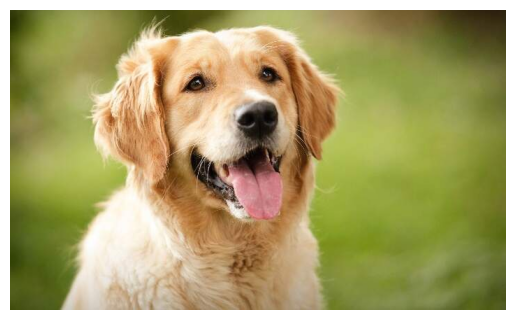

In [14]:
# Pick an example image (you can upload)
img_path = '/content/dog.jpg'  # upload to Colab or provide URL and download
prompt = "A Dog"            # example text prompt

image = Image.open(img_path).convert('RGB')
plt.imshow(image); plt.axis('off')


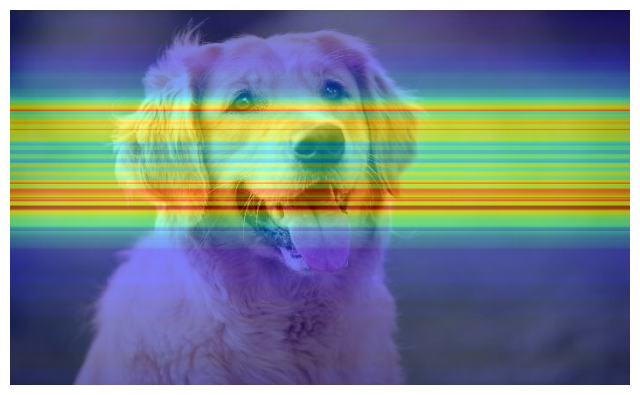

In [16]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
from PIL import Image
import torch, numpy as np, matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load model + processor
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)

# Input image and text prompt
prompt = ["A Dog"]  # list of one or more prompts
image = Image.open("/content/dog.jpg").convert("RGB")

# Prepare input
inputs = processor(text=prompt, images=image, return_tensors="pt").to(device)

# Predict segmentation mask
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.sigmoid(outputs.logits)   # shape: [1, 1, H, W]

# Convert to numpy (H, W)
mask = preds[0][0].cpu().numpy()

# Resize mask to match original image size
mask_resized = np.array(Image.fromarray(mask).resize(image.size, resample=Image.BILINEAR))

# Display overlay
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.imshow(mask_resized, alpha=0.5, cmap='jet')
plt.axis('off')
plt.show()
